# Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, BatchNormalization
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Load Data

In [2]:
dataset = load_iris(as_frame=True)

In [3]:
X, y = dataset['data'], dataset['target']

In [4]:
X.shape, y.shape

((150, 4), (150,))

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [6]:
print([item.shape for item in (X_train, X_test, y_train, y_test)])

[(112, 4), (38, 4), (112,), (38,)]


# Preview

In [7]:
print(dataset['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [8]:
X_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
4,5.0,3.6,1.4,0.2
32,5.2,4.1,1.5,0.1
142,5.8,2.7,5.1,1.9
85,6.0,3.4,4.5,1.6
86,6.7,3.1,4.7,1.5


In [9]:
y_train.head()

4      0
32     0
142    2
85     1
86     1
Name: target, dtype: int32

# Preprocess

In [10]:
y_train, y_test = (tf.keras.utils.to_categorical(y) for y in (y_train, y_test))

# Model

In [11]:
model = Sequential([
    Dense(64, input_shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),    
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(y_train.shape[1], activation='softmax')
])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                320       
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 195       
Total params: 33,603
Trainable params: 33,603
Non-trainable params: 0
_________________________________________________________________


In [13]:
model(X_train).shape

TensorShape([112, 3])

In [14]:
X_train.shape

(112, 4)

# Training

In [15]:
model.compile(loss=categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

In [16]:
history = model.fit(X_train, y_train,
                    batch_size=16,
                    epochs=1000,
                    validation_split=0.2,
                    callbacks=[
                        EarlyStopping(monitor='val_accuracy', patience=100)],
                    verbose=0)

<AxesSubplot:>

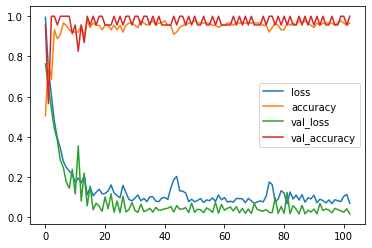

In [17]:
pd.DataFrame(history.history).plot()

# Evaluation

In [18]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, batch_size=32)
print(f'Test loss: {test_loss:.6f}, Test acc: {test_accuracy:.2%}')

2/2 [==============================] - 0s 2ms/step - loss: 0.0373 - accuracy: 0.9737
Test loss: 0.037335, Test acc: 97.37%


In [19]:
y_test_pred = model.predict(X_test)

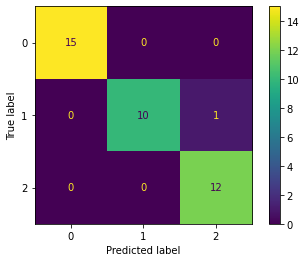

In [20]:
cmat = confusion_matrix(
    y_true=y_test.argmax(axis=1), 
    y_pred=y_test_pred.argmax(axis=1))
ConfusionMatrixDisplay(cmat).plot()

# Application

In [21]:
def application(idx=None):
    if idx is None:
        idx = np.random.randint(len(X_test))
    print('Collected new features as follows:')    
    print(X_test.iloc[idx])
    forecasted = np.argmax(model(X_test[idx:idx+1])[0])    
    actual = np.argmax(y_test[idx])    
    print(f'\n{"CORRECT" if forecasted==actual else "WRONG"}')
    print(f'\nModel forecasted as {forecasted}')
    print(f'\nActual data should be {actual}')

In [22]:
application()

Collected new features as follows:
sepal length (cm)    6.4
sepal width (cm)     3.2
petal length (cm)    4.5
petal width (cm)     1.5
Name: 51, dtype: float64

CORRECT

Model forecasted as 1

Actual data should be 1
